In [1]:
import numpy as np    
import pandas as pd

import tensorflow as tf                       
                       
import matplotlib.pyplot as plt   
import seaborn as sns            

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
X_train[5].shape

(32, 32, 3)

In [5]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

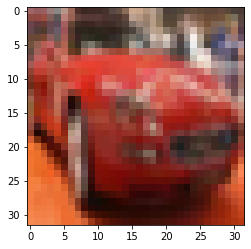

In [6]:
plt.imshow(X_train[5]);

In [7]:
y_train[5]

array([1], dtype=uint8)

In [8]:
y_train.shape

(50000, 1)

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
rand_index = int(np.random.randint(low=0, high=50000, size=1))

In [12]:
X_train[rand_index]

array([[[ 61,  50,  46],
        [ 88,  67,  65],
        [ 47,  33,  32],
        ...,
        [  7,   6,  11],
        [  7,   6,  11],
        [  6,   6,   6]],

       [[ 65,  54,  52],
        [ 88,  70,  69],
        [ 44,  32,  30],
        ...,
        [  7,   6,   9],
        [  5,   4,   7],
        [  3,   3,   4]],

       [[ 69,  58,  58],
        [ 78,  68,  70],
        [ 39,  28,  27],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  6,   6,   6]],

       ...,

       [[ 88,  59,  41],
        [ 92,  56,  34],
        [ 96,  49,  31],
        ...,
        [ 53,  34,  25],
        [ 32,  24,  19],
        [ 15,  11,  12]],

       [[ 97,  52,  34],
        [106,  59,  39],
        [ 97,  51,  30],
        ...,
        [ 68,  49,  31],
        [ 47,  39,  24],
        [ 24,  19,  17]],

       [[100,  46,  31],
        [101,  64,  42],
        [ 97,  70,  40],
        ...,
        [ 83,  66,  37],
        [ 59,  48,  24],
        [ 33,  23,  19]]

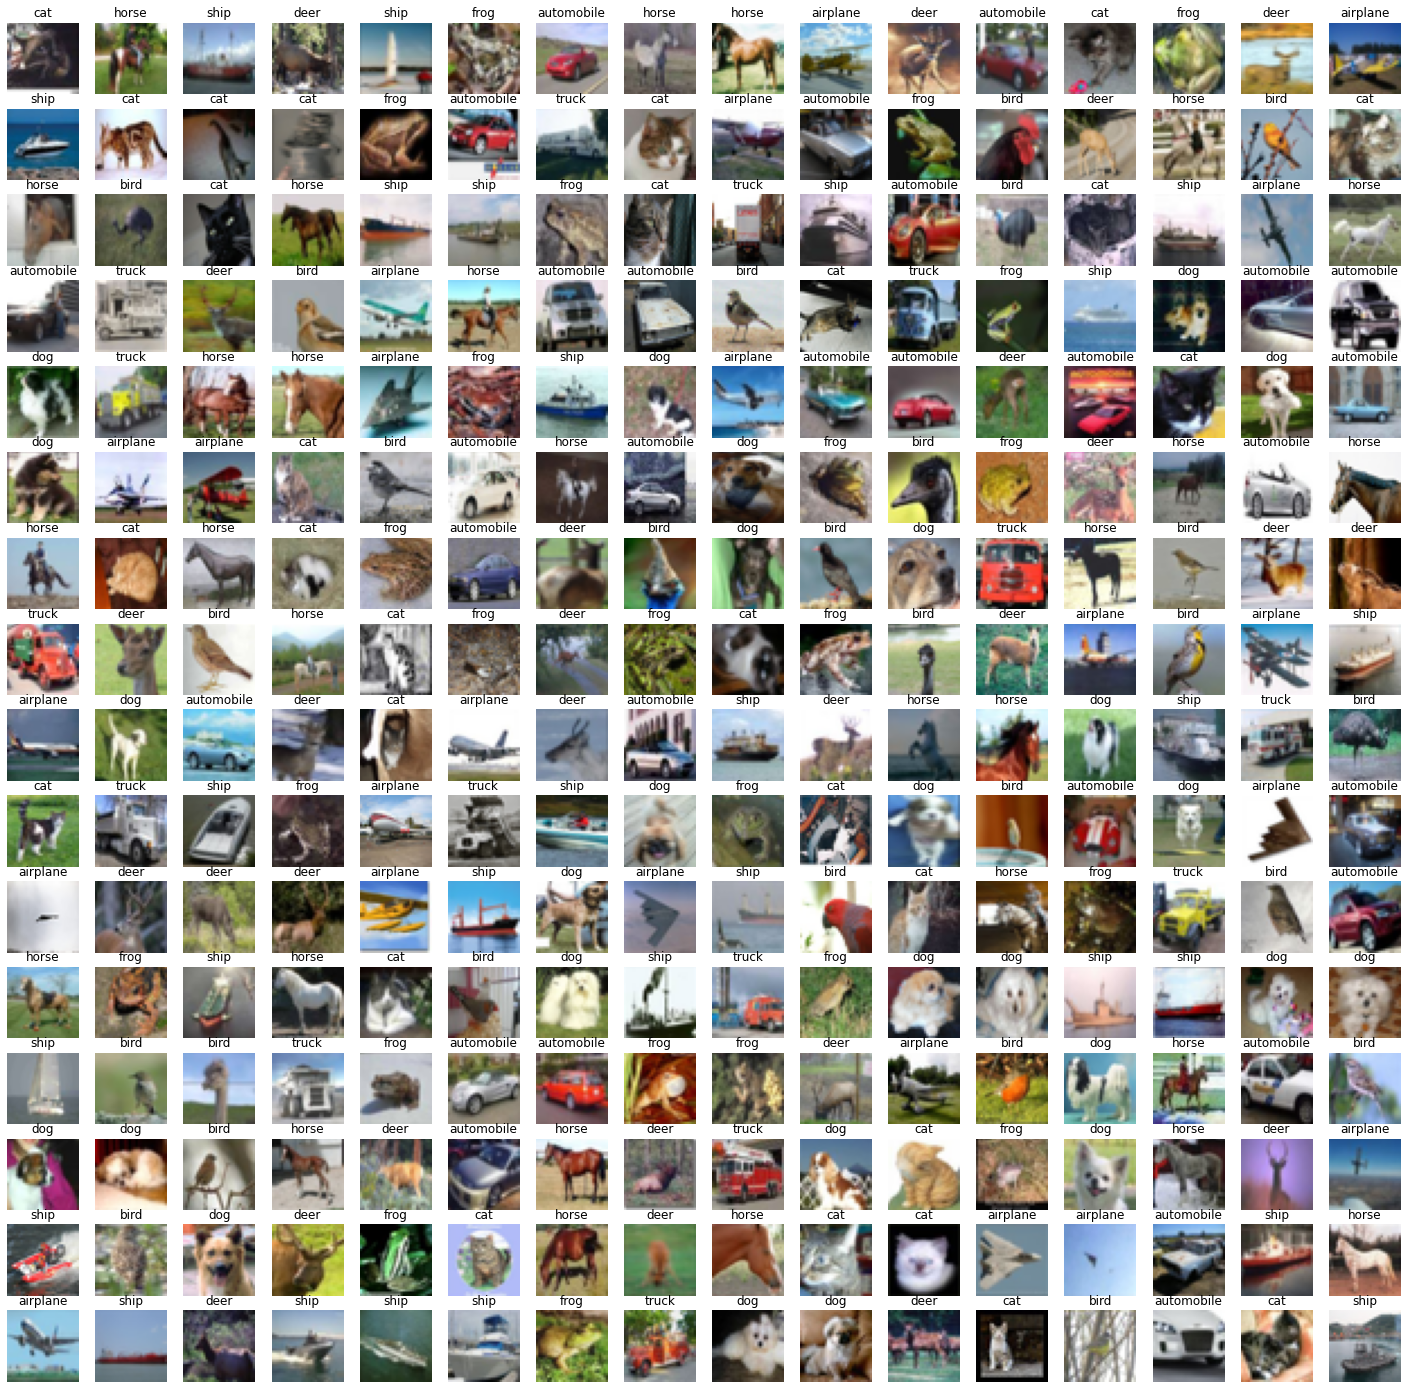

In [13]:
plt.figure(figsize=(25, 25))

for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1, label = classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) # This function do labelEncoding and get dummies to label for softmax activation function.
y_test = to_categorical(y_test, 10)
y_test.shape 

(10000, 10)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = 3 , input_shape = (32,32,3) , activation = 'relu' , padding = 'same')) # We use padding 'same' .
model.add(Conv2D(filters = 64 , kernel_size = 3 , input_shape = (32,32,3) , activation = 'relu' , padding = 'same'))
model.add(MaxPool2D(pool_size = 2))

model.add(Conv2D(filters = 32 , kernel_size = 3 , input_shape = (16,16,3) , activation = 'relu' , padding = 'same')) 
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))

model.add(Dense(64 , activation = 'relu'))

model.add(Dense(32 , activation = 'relu'))

model.add(Dense(10 , activation = 'softmax'))


opt = Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss' , patience=5)

In [21]:
model.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.1 , callbacks=[early_stop])

Epoch 1/50
1407/1407 [==============================] - 11s 6ms/step - loss: 1.4539 - accuracy: 0.4716 - val_loss: 1.1102 - val_accuracy: 0.6080
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0195 - accuracy: 0.6407 - val_loss: 0.8965 - val_accuracy: 0.6912
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8416 - accuracy: 0.7070 - val_loss: 0.8349 - val_accuracy: 0.7108
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7293 - accuracy: 0.7441 - val_loss: 0.7957 - val_accuracy: 0.7280
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6418 - accuracy: 0.7771 - val_loss: 0.7879 - val_accuracy: 0.7332
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5683 - accuracy: 0.7997 - val_loss: 0.8058 - val_accuracy: 0.7362
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4954 - accuracy: 0.8257 - val_loss: 0.8325 - val_accuracy

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,1.453908,0.471578,1.110224,0.6080
1,1.019499,0.640711,0.896539,0.6912
2,0.841587,0.707000,0.834924,0.7108
3,0.729288,0.744111,0.795651,0.7280
4,0.641840,0.777133,0.787907,0.7332


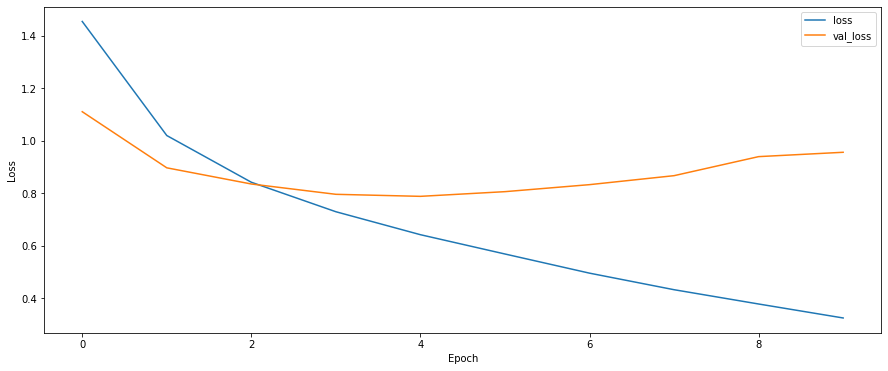

In [25]:
plt.figure(figsize=(15, 6))

plt.plot(history.loss, label="loss")
plt.plot(history.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

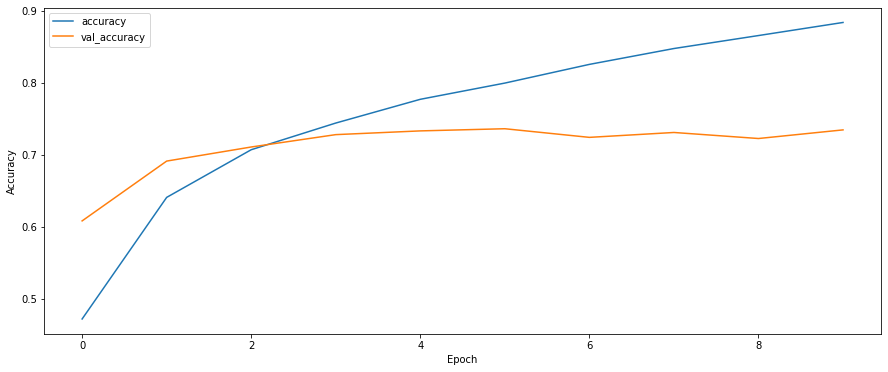

In [26]:
plt.figure(figsize=(15, 6))

plt.plot(history.accuracy, label="accuracy")
plt.plot(history.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [29]:
print(model.evaluate(X_test, y_test, verbose=1))

313/313 [==============================] - 1s 3ms/step - loss: 1.0290 - accuracy: 0.7225
[1.0290273427963257, 0.7225000262260437]


In [30]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [32]:
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_test = y_test.argmax(axis = 1)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      1000
           1       0.84      0.84      0.84      1000
           2       0.61      0.61      0.61      1000
           3       0.53      0.56      0.55      1000
           4       0.63      0.74      0.68      1000
           5       0.62      0.66      0.64      1000
           6       0.79      0.77      0.78      1000
           7       0.83      0.73      0.78      1000
           8       0.84      0.82      0.83      1000
           9       0.81      0.81      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [39]:
print(confusion_matrix(y_test, y_pred))

[[679  15  94  23  47  11  12  13  67  39]
 [ 11 845  10   7   4   3   3   5  35  77]
 [ 42   6 614  74 109  69  50  18  11   7]
 [ 23  11  54 563  73 177  53  24   5  17]
 [  9   5  51  70 737  34  42  40   8   4]
 [  8   4  51 166  52 661  23  27   2   6]
 [  7   6  35  79  56  26 772   1  11   7]
 [ 12   2  55  39  76  67  10 726   1  12]
 [ 47  32  24  18  15   6  10   5 817  26]
 [ 33  79  11  14   6   8   7  14  17 811]]


In [41]:
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [42]:
my_image = X_test[44]

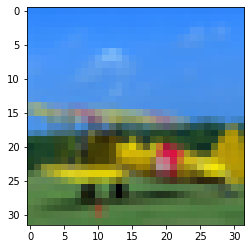

In [43]:
plt.imshow(my_image);

In [46]:
img_pred = model.predict(my_image.reshape(1,32,32,3)).argmax(axis = 1)

1/1 [==============================] - 0s 16ms/step


In [47]:
img_pred

array([0])

In [48]:
classes[int(img_pred)]

'airplane'

In [ ]:
# model.save("cnn-1.h5")

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience = 15)

In [49]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' , input_shape = (32,32,3) , padding = 'same'))
model.add(Conv2D(filters = 64 , kernel_size = 3 , activation = 'relu' , input_shape = (32,32,3) , padding = 'same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' , input_shape = (16,16,3) , padding = 'same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))

#model.add(Dense(128, activation = 'relu'))

model.add(Dense(10 , activation = 'softmax'))


opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt ,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [52]:
model.fit(X_train , y_train , validation_split = 0.1 , batch_size = 32 , epochs = 50 , callbacks = [early_stop])

Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5015 - accuracy: 0.4579 - val_loss: 1.1711 - val_accuracy: 0.5952
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1308 - accuracy: 0.5973 - val_loss: 0.9962 - val_accuracy: 0.6654
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9834 - accuracy: 0.6539 - val_loss: 0.8356 - val_accuracy: 0.7106
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8831 - accuracy: 0.6875 - val_loss: 0.7775 - val_accuracy: 0.7296
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8118 - accuracy: 0.7137 - val_loss: 0.7555 - val_accuracy: 0.7412
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7559 - accuracy: 0.7335 - val_loss: 0.7371 - val_accuracy: 0.7454
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7116 - accuracy: 0.7487 - val_loss: 0.7107 - val_accuracy:

In [55]:
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [56]:
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 [==============================] - 1s 2ms/step


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1000
           1       0.89      0.85      0.87      1000
           2       0.68      0.66      0.67      1000
           3       0.55      0.63      0.59      1000
           4       0.78      0.69      0.73      1000
           5       0.73      0.53      0.61      1000
           6       0.76      0.85      0.80      1000
           7       0.78      0.84      0.81      1000
           8       0.84      0.86      0.85      1000
           9       0.80      0.88      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



In [59]:
print(confusion_matrix(y_test, y_pred))

[[770  16  59  23   5   2   9  10  69  37]
 [ 12 855   3   6   2   0   6   3  24  89]
 [ 57   5 658  62  58  35  70  30  16   9]
 [ 27   5  63 631  45  92  72  34  12  19]
 [ 23   2  57  60 685  24  61  77   8   3]
 [ 18   7  56 240  34 529  28  63  10  15]
 [  5   6  31  62  21   9 850   5   6   5]
 [ 15   3  29  33  28  26  12 839   2  13]
 [ 43  23   6  18   4   3   6   6 863  28]
 [ 25  41   4  10   1   2   4  14  20 879]]


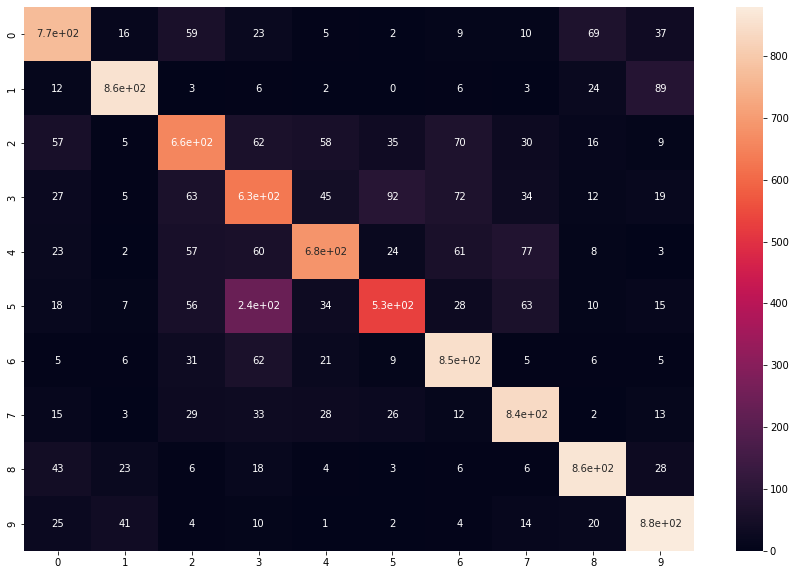

In [61]:
plt.figure(figsize=(15,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [62]:
from tensorflow.keras.layers import BatchNormalization

In [64]:
early_stop = EarlyStopping(monitor = 'val_loss' , patience=10)

In [67]:
model = Sequential()

model.add(Conv2D(32 , 3 , padding = 'same' , activation = 'relu' , input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32 , 3 , padding = 'same' , activation = 'relu' , input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.3))

model.add(Conv2D(64 , 3 , padding = 'same' , activation = 'relu' , input_shape = (16,16,3)))
model.add(BatchNormalization())
model.add(Conv2D(64 , 3 , padding = 'same' , activation = 'relu' , input_shape = (16,16,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.5))

model.add(Conv2D(128 , 3 , padding = 'same' , activation = 'relu' , input_shape = (8,8,3)))
model.add(BatchNormalization())
model.add(Conv2D(128 , 3 , padding = 'same' , activation = 'relu' , input_shape = (8,8,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.5))

model.add(Conv2D(256 , 3 , padding = 'same' , activation = 'relu' , input_shape = (4,4,3)))
model.add(BatchNormalization())
model.add(Conv2D(256 , 3 , padding = 'same' , activation = 'relu' , input_shape = (4,4,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256 , activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128 , activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10 , activation = 'softmax'))


opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt,
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [69]:
model.fit(X_train , y_train , validation_split = 0.1 , batch_size = 32 , epochs = 100 , callbacks = [early_stop])

Epoch 1/100
1407/1407 [==============================] - 15s 9ms/step - loss: 1.9045 - accuracy: 0.3260 - val_loss: 1.7791 - val_accuracy: 0.3558
Epoch 2/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3472 - accuracy: 0.5189 - val_loss: 1.1857 - val_accuracy: 0.5818
Epoch 3/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.1468 - accuracy: 0.5971 - val_loss: 0.8832 - val_accuracy: 0.6914
Epoch 4/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.0173 - accuracy: 0.6522 - val_loss: 0.9131 - val_accuracy: 0.6756
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9290 - accuracy: 0.6861 - val_loss: 0.7091 - val_accuracy: 0.7584
Epoch 6/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.8509 - accuracy: 0.7146 - val_loss: 0.7073 - val_accuracy: 0.7574
Epoch 7/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.7986 - accuracy: 0.7353 - val_loss: 0.6166 -

In [71]:
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [72]:
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 [==============================] - 1s 4ms/step


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.93      0.94      0.93      1000
           2       0.82      0.80      0.81      1000
           3       0.78      0.69      0.73      1000
           4       0.85      0.86      0.85      1000
           5       0.79      0.82      0.81      1000
           6       0.88      0.92      0.90      1000
           7       0.91      0.91      0.91      1000
           8       0.90      0.94      0.92      1000
           9       0.93      0.91      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
# Done !